## In this script we contrast specific country pathways for illustration

#### Specifically we measure the decarbonization rates, so emission reductions rates in per capita terms for all countries specifically and under two distinct scenarios (i) countries above 10000 with degrowth, (ii) with continuous growth for above 10000

In [1]:
from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns  # Import seaborn for density plots
from scipy.stats import gaussian_kde
import numpy as np

# Scenario 1 steady_state_high_income_assumption": "off"
scenario_params = {"end_year": 2060,
                   "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1150*0.95 - 2*35, # in terms of GtCO2 that is gigatons of CO2   and times 95% because 95% population coverage     
                   "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on
                   "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
                   "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   "steady_state_high_income_assumption": "on_with_growth", # this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
                   "k": 0.05,
                   "t0": 2060,
                   "final_improvement_rate": -0.05,
                   "population_hysteresis_assumption": "on", # t this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
                   "run_until_2100": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
                   "cdr_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
                   "cdr_level_2100": 5 #  in gigatons of
            
            }

scenario_1 = Scenario(scenario_params)
#test = scenario_1.raw_data
scenario_1.compute_country_scenario_params()
scenario_1.run()

# Scenario 2 steady_state_high_income_assumption": "on_with_growth"
scenario2_params = {"end_year": 2060,
                   "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1150*0.95 - 2*35, # in terms of GtCO2 that is gigatons of CO2   and times 95% because 95% population coverage     
                   "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on
                   "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
                   "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   "steady_state_high_income_assumption": "on_with_growth", # this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
                   "k": 0.05,
                   "t0": 2060,
                   "final_improvement_rate": -0.05,
                   "population_hysteresis_assumption": "on", # t this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
                   "run_until_2100": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
                   "cdr_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
                   "cdr_level_2100": 5 #  in gigatons of
            
            }

scenario_2 = Scenario(scenario2_params)
#test = scenario_1.raw_data
scenario_2.compute_country_scenario_params()
scenario_2.run()


In [2]:
# import data historical cagr from this "C:\Users\yoswald\Dropbox\Arbeit\postdoc_lausanne\papers\convergence\data\pip_all_data\cagrs_emissions.csv"
cagr_data = pd.read_csv("./data/pip_all_data/cagrs_emissions.csv", sep = ";")
     

In [3]:
import pandas as pd
# Assuming scenario_1.countries is a list-like object with each element having a .name and .carbon_emissions_pc_trajectory attribute
data = {country.code: country.carbon_emissions_pc_trajectory for country in scenario_1.countries.values()}
df_emissions = pd.DataFrame(data).T  # Transpose to have countries as rows and years as columns
# same for total emissions
data = {country.code: country.emissions_trajectory for country in scenario_1.countries.values()}
df_emissions_total = pd.DataFrame(data).T  # Transpose to have countries as rows and years as columns
# save regions for countries from scenario_1
regions = {country.code: country.region for country in scenario_1.countries.values()}


def calculate_cagr(ev, bv, n):
    """Calculate the Compound Annual Growth Rate (CAGR)."""
    return (ev / bv) ** (1 / n) - 1

# Calculate the CAGR for each country in df_emissions and df_emissions_total
cagr_emissions = df_emissions.apply(lambda x: calculate_cagr(x[2060], x[2022], 38), axis=1)
cagr_emissions_total = df_emissions_total.apply(lambda x: calculate_cagr(x[2060], x[2022], 38), axis=1)


# now plot cagr_emissions_total against cagr_data column cagr_total_2010to2020 and cagr_emissions against cagr_data column cagr_pc_2010to2020 in one plot two panels using gridspec
# remove PSE and XKX from cagr_emissions and cagr_emissions_total
cagr_emissions = cagr_emissions.drop(['PSE', 'XKX'])
cagr_emissions_total = cagr_emissions_total.drop(['PSE', 'XKX'])
#drop these two from regions also 
regions.pop('PSE', None)
regions.pop('XKX', None)

# insert a new column for cagr_emissions and cagr_emissions_total with regions
cagr_emissions = cagr_emissions.to_frame()
cagr_emissions_total = cagr_emissions_total.to_frame()
cagr_emissions['region'] = cagr_emissions.index.map(regions)
cagr_emissions_total['region'] = cagr_emissions_total.index.map(regions)


this is y_data AGO    0.013244
ALB   -0.004410
ARE   -0.031594
ARM   -0.002095
AUS   -0.025913
         ...   
VUT    0.027090
WSM    0.017203
ZAF   -0.001002
ZMB    0.031300
ZWE    0.029798
Name: 0, Length: 148, dtype: float64


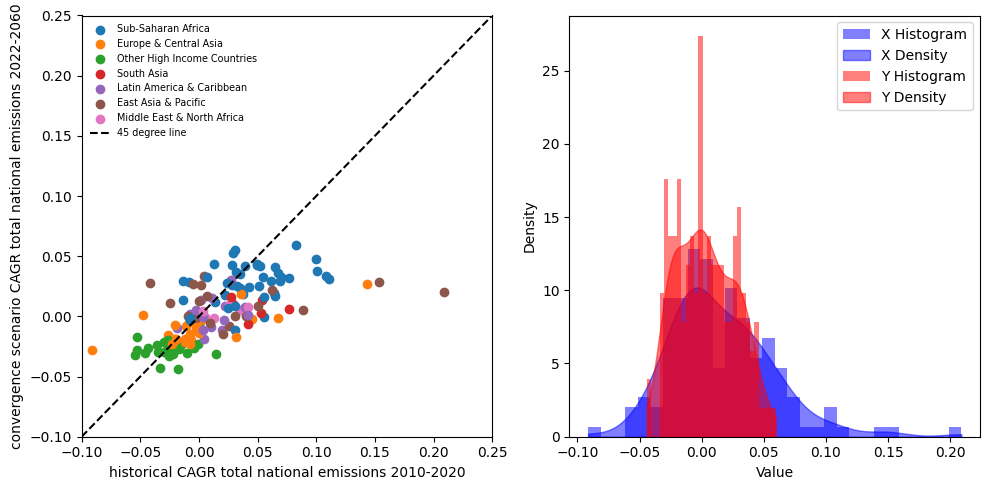

In [4]:
# now plot cagr_emissions_total against cagr_data column cagr_total_2010to2020 and cagr_emissions against cagr_data column cagr_pc_2010to2020 in one plot two panels using gridspec
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2)

# First plot: Scatter plot
ax1 = plt.subplot(gs[0, 0])

# Generating a unique color for each region
unique_regions = cagr_emissions_total['region'].unique()
# Creating the region_color_mapping
region_color_mapping = {region: color for region, color in zip(unique_regions, cm.tab10.colors[:len(unique_regions)])}


regions_appeared = set()
# Loop over all countries indexed in cagr_emissions
for country_code in cagr_emissions_total.index:
    # set region equal to cagr_emissions_total.index with the column region value
    region = cagr_emissions_total.loc[country_code]['region']
    if region:
        # Check if the region has appeared already
        label = None if region in regions_appeared else region
        regions_appeared.add(region)  # Mark the region as appeared

        # Plotting
        x_value = cagr_data[cagr_data['country_code'] == country_code]['cagr_total_2010to2020']
        y_value = cagr_emissions_total.loc[country_code]
        x_value = x_value.iloc[0]
        y_value = y_value.iloc[0]
        ax1.scatter(x_value, y_value, color=region_color_mapping.get(region, 'black'), label=label)

ax1.set_xlabel('historical CAGR total national emissions 2010-2020')
ax1.set_ylabel('convergence scenario CAGR total national emissions 2022-2060')
# plot 45 degree line also in this plot black and dashed
x = np.linspace(-0.1, 0.25, 100)
y = x
ax1.plot(x, y, color='black', linestyle='--', label='45 degree line')
# Add legend no frame and very small font
ax1.legend(frameon=False, fontsize='x-small')
# no margins
ax1.margins(0)
# set x axis limit and y axis limit
ax1.set_xlim(-0.1, 0.25)
ax1.set_ylim(-0.1, 0.25)




# Second plot: Density estimates with histograms
ax2 = plt.subplot(gs[0, 1])

# Histogram and density for x variable
x_data = cagr_data['cagr_total_2010to2020']
x_density = gaussian_kde(x_data)
x_vals = np.linspace(min(x_data), max(x_data), 1000)
ax2.hist(x_data, bins=30, density=True, alpha=0.5, color='blue', label='X Histogram')
ax2.fill_between(x_vals, x_density(x_vals), alpha=0.5, color='blue', label='X Density')

# Histogram and density for y variable
y_data = cagr_emissions_total
# only second column of x_data is used
y_data = y_data.iloc[:, 0]
print("this is y_data", y_data)
y_density = gaussian_kde(y_data)
y_vals = np.linspace(min(y_data), max(y_data), 1000)
ax2.hist(y_data, bins=30, density=True, alpha=0.5, color='red', label='Y Histogram')
ax2.fill_between(y_vals, y_density(y_vals), alpha=0.5, color='red', label='Y Density')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()


this is usa_emissions_1_list [4316396625.501761, 4216950835.608746, 4119120183.1629415, 4022898823.3474555, 3928299704.547074, 3833939045.9496894, 3739910274.303347, 3646304445.482982, 3553210089.940504, 3460713065.561071, 3368896418.3475175, 3277840251.346309, 3187621602.218193, 3098314329.844549, 3009989010.346001, 2922712842.8726187, 2836549565.5049243, 2751559381.581253, 2667798896.7397985, 2585321066.932367, 2504175157.6314273, 2424406714.412216, 2346057545.0474305, 2269165713.2034125, 2193765543.7738576, 2119887639.8301911, 2047558911.107235, 1976802613.8791654, 1907638402.0145938, 1840082388.9316974, 1774147220.1054866, 1709842155.710482, 1647173162.914284, 1586143017.2718523, 1526751412.6077795, 1468995078.7156458, 1412867906.1505957, 1358361077.3446918, 1305463203.2351544, 1254160464.564159, 1204436756.9859855, 1156273839.1034715, 1109651482.55123, 1064547623.2479866, 1020938512.9545836, 978798870.297438, 938102030.448958, 898820092.6961001, 860924065.1749815, 824384006.102439

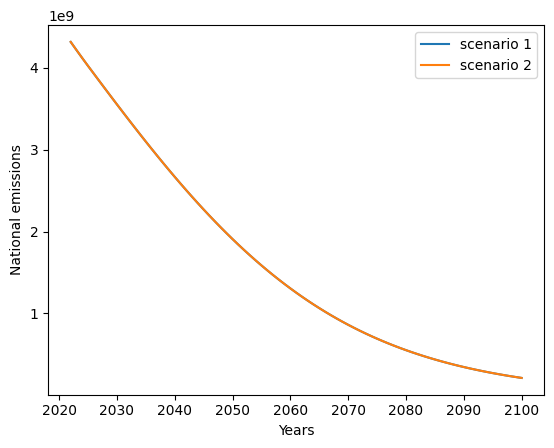

In [5]:
# from scenario_1 and scenario_2 get the national emission trajectories of the USA
usa_emissions_1 = scenario_1.countries['United States'].emissions_trajectory
usa_emissions_2 = scenario_2.countries['United States'].emissions_trajectory


# from dicts usa_emissions_1 and usa_emissions_2 get the national emission trajectories of the USA over the years
usa_emissions_1_list = list(usa_emissions_1.values())
usa_emissions_2_list = list(usa_emissions_2.values())
print("this is usa_emissions_1_list", usa_emissions_1_list)
# now get the years from index
years = list(usa_emissions_1.keys())
print("this is years", years)
# now plot plot usa_emissions_1 and usa_emissions_2 against years
fig, ax = plt.subplots()
ax.plot(years, usa_emissions_1_list, label='scenario 1')
ax.plot(years, usa_emissions_2_list, label='scenario 2')
ax.set_xlabel('Years')
ax.set_ylabel('National emissions')
ax.legend()
plt.show()

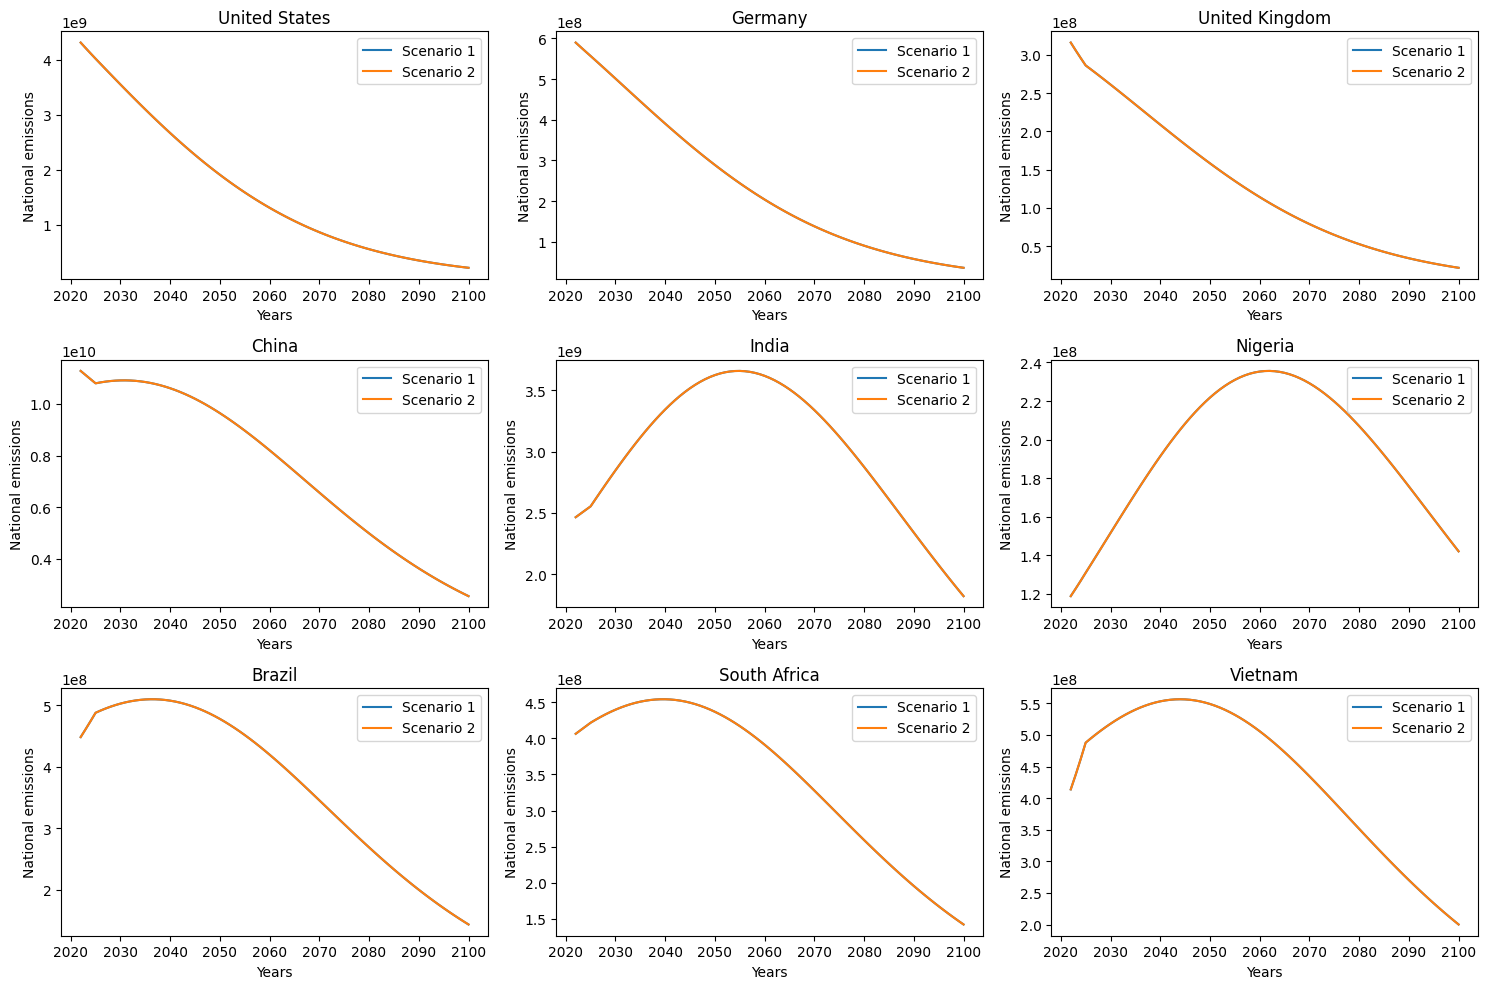

In [6]:
# List of countries to plot
countries = ["United States", "Germany", "United Kingdom", "China", "India", "Nigeria", "Brazil", "South Africa", "Vietnam"]

# Creating the figure and a grid of subplots
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3)  # 3x3 grid

for i, country in enumerate(countries):
    ax = fig.add_subplot(gs[i // 3, i % 3])  # Determine the row and column index
    # Extract the emission data for the current country from both scenarios
    emissions_1 = list(scenario_1.countries[country].emissions_trajectory.values())
    emissions_2 = list(scenario_2.countries[country].emissions_trajectory.values())
    years = list(scenario_1.countries[country].emissions_trajectory.keys())  # Assuming years are the same for both scenarios

    # Plotting the data
    ax.plot(years, emissions_1, label='Scenario 1')
    ax.plot(years, emissions_2, label='Scenario 2')
    ax.set_title(country)
    ax.set_xlabel('Years')
    ax.set_ylabel('National emissions')
    ax.legend()

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

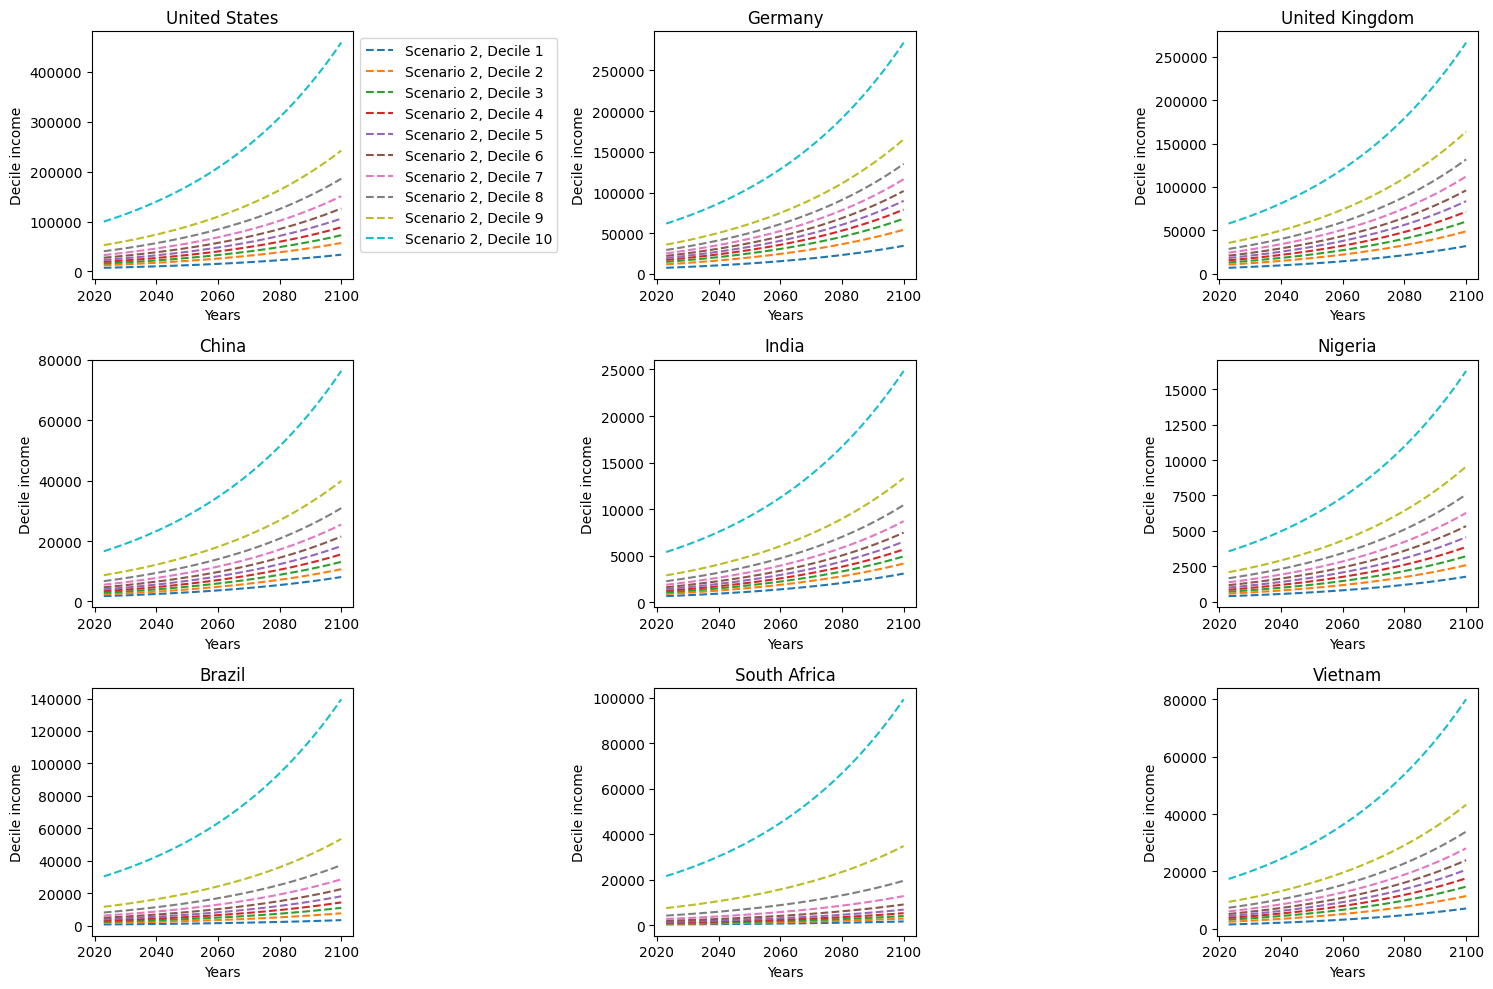

In [7]:
# do the same for income decile trajectories of the countries

# Assuming scenario_1 and scenario_2 are instances of a class that has decile_trajectories attribute
# List of countries to plot
countries = ["United States", "Germany", "United Kingdom", "China", "India", "Nigeria", "Brazil", "South Africa", "Vietnam"]

# Creating the figure and a grid of subplots
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3)  # 3x3 grid

for i, country in enumerate(countries):
    ax = fig.add_subplot(gs[i // 3, i % 3])  # Determine the row and column index

    # Assuming scenario_1 and scenario_2 have the same years and decile structure
    years = sorted(list(scenario_1.countries[country].decile_trajectories['decile1'].keys()))
    
    for decile_num in range(1, 11):
        decile_key = f'decile{decile_num}'
        decile_income_1 = [scenario_1.countries[country].decile_trajectories[decile_key][year] for year in years]
        decile_income_2 = [scenario_2.countries[country].decile_trajectories[decile_key][year] for year in years]
        
        # Plotting the decile data for both scenarios
        #ax.plot(years, decile_income_1, label=f'Scenario 1, Decile {decile_num}')
        ax.plot(years, decile_income_2, label=f'Scenario 2, Decile {decile_num}', linestyle='--')  # Dashed line for scenario 2

    ax.set_title(country)
    ax.set_xlabel('Years')
    ax.set_ylabel('Decile income')
    
    # Optional: Only add a legend for the first subplot to avoid clutter
    if i == 0:
        ax.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()